<a href="https://colab.research.google.com/github/Ayo-Cyber/Bot_00/blob/main/IBM_HR_Analysis_And_Prediction_Using_Logistic_Regression%2CRandom_Forest_and_XGB_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.sample(8)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
58,31,No,Travel_Rarely,655,Research & Development,7,4,Life Sciences,1,76,4,Male,48,3,2,Laboratory Technician,4,Divorced,5915,9528,3,Y,No,22,4,4,80,1,10,3,2,7,7,1,7
546,29,No,Travel_Rarely,1396,Sales,10,3,Life Sciences,1,749,3,Male,99,3,1,Sales Representative,3,Single,2642,2755,1,Y,No,11,3,3,80,0,1,6,3,1,0,0,0
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,3,Female,38,4,2,Healthcare Representative,2,Married,4244,9931,1,Y,No,24,4,4,80,1,8,2,3,8,7,3,7
568,55,Yes,Travel_Rarely,725,Research & Development,2,3,Medical,1,787,4,Male,78,3,5,Manager,1,Married,19859,21199,5,Y,Yes,13,3,4,80,1,24,2,3,5,2,1,4
992,39,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,1397,3,Male,71,3,3,Healthcare Representative,3,Married,10920,3449,3,Y,No,21,4,2,80,1,13,2,3,6,4,0,5
744,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1033,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
716,41,No,Travel_Frequently,840,Research & Development,9,3,Medical,1,999,1,Male,64,3,5,Research Director,3,Divorced,19419,3735,2,Y,No,17,3,2,80,1,21,2,4,18,16,0,11


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
numeric_cols = df.select_dtypes(include=['int64' ,'float64']).columns.tolist()
category_cols = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
df[numeric_cols].sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
48,46,1211,5,4,1,62,1,98,3,2,4,5772,20445,4,21,4,3,80,0,14,4,3,9,6,0,8
968,36,607,7,3,1,1362,1,83,4,2,1,4639,2261,2,16,3,4,80,1,17,2,2,15,7,6,13
486,37,558,2,3,1,656,4,75,3,2,3,9602,3010,4,11,3,3,80,1,17,3,2,3,0,1,0
341,38,343,15,2,1,461,3,92,2,3,4,11510,15682,0,14,3,2,80,1,12,3,3,11,10,2,9
16,32,334,5,2,1,21,1,80,4,1,2,3298,15053,0,12,3,4,80,2,7,5,2,6,2,0,5


In [8]:
df[category_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1231,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No
112,No,Non-Travel,Human Resources,Human Resources,Female,Manager,Single,Y,Yes
1245,No,Travel_Frequently,Human Resources,Medical,Male,Human Resources,Married,Y,No
24,Yes,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Y,No
122,Yes,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes


In [9]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


([<matplotlib.patches.Wedge at 0x7f15f2d3de50>,
 [Text(-1.4865598586092734, 0.8247058789481118, 'No'),
  Text(1.530282207391899, -0.8489619342112917, 'Yes')],
 [Text(-0.830724626869888, 0.46086505000041533, '83.9%'),
  Text(0.8744469756525135, -0.4851211052635952, '16.1%')])

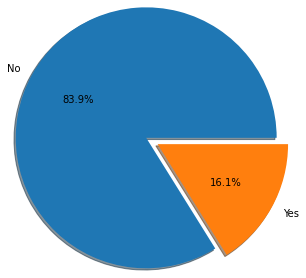

In [10]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r , explode=[0.05,0.1] , labels=["No","Yes"] , shadow = True , radius = 1.5 , autopct="%1.1f%%")

In [10]:
len(df[numeric_cols])

1470

In [12]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
len(df[category_cols])

1470

In [13]:
df[category_cols].columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [15]:
len(df)

1470

In [18]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [16]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [17]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [19]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [20]:
df1 = df.drop(["StandardHours","EmployeeCount"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


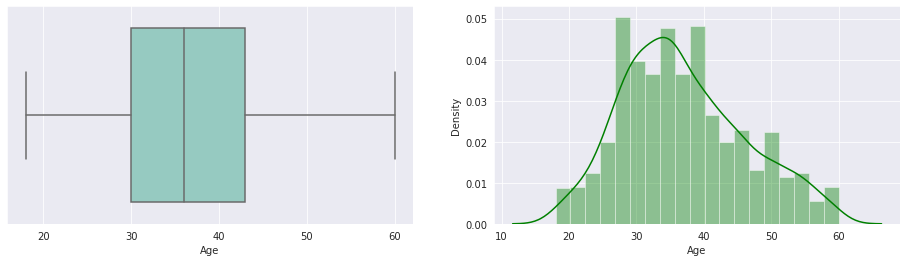

In [21]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3", x = df['Age'])
sns.distplot(ax = axes[1],color = "Green",a=df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


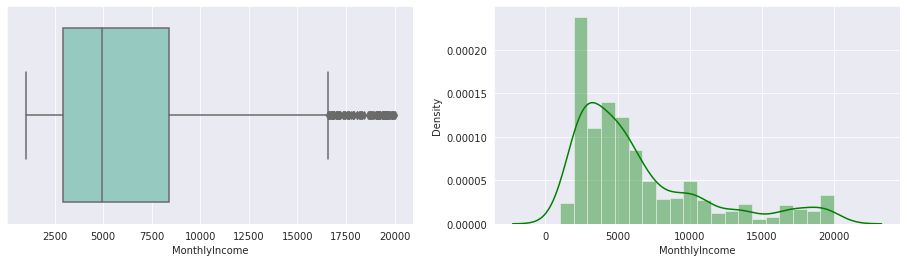

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3",x = df['MonthlyIncome'])
sns.distplot(ax = axes[1],color = "Green",a=df["MonthlyIncome"])

In [23]:
from sklearn.preprocessing import LabelEncoder
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel               int64
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int64
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [26]:
df.drop('Over18',axis=1,inplace=True)

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
cols = list(df.columns)
cols.remove("Attrition")
sampled , target = SMOTE().fit_resample(df[cols] , df["Attrition"])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [30]:
sampled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1,309,1,15,1,3,1275,2,0,77,3,3,0,4,1,7564,23134,0,0,13,3,1,0,9,1,2,8,6,6,7
2462,18,2,483,1,19,1,1,202,3,1,50,3,1,7,3,2,1637,26585,1,0,18,3,3,0,0,2,2,0,0,0,0
2463,52,2,1162,2,23,3,1,1962,1,1,65,2,2,7,1,1,10437,5835,5,0,12,3,2,0,14,2,2,2,2,2,2
2464,35,1,306,1,9,4,2,1808,4,1,74,3,2,3,1,1,4745,5563,2,0,15,3,2,0,10,3,1,8,2,0,7


In [37]:
sampled[cols]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,31,2,332,1,21,3,3,1377,3,1,96,3,2,4,3,1,6157,21066,1,0,15,3,3,1,10,3,2,9,2,6,6
2462,42,2,1379,2,9,3,2,1239,1,0,86,1,2,7,2,1,5421,9409,7,0,13,3,2,0,7,2,2,3,2,1,2
2463,24,2,681,1,3,2,2,574,1,0,85,3,1,2,1,1,4044,9455,4,0,13,3,2,1,5,4,3,2,2,0,2
2464,32,1,1224,2,12,4,3,945,2,1,43,3,2,7,1,0,4334,11193,2,0,19,3,2,0,10,2,1,5,3,2,3


In [31]:
X_train , X_test , y_train , y_test = train_test_split(sampled[cols] , target , test_size=0.3 , shuffle= True)

In [33]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),y_test)))

Train Accuracy : 0.82 %
Test Accuracy : 0.82 %


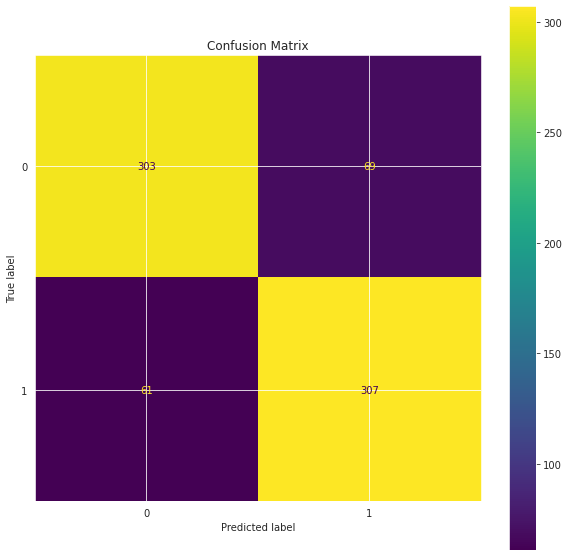

In [35]:
cm = confusion_matrix(y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [36]:
random_forest = RandomForestClassifier(n_estimators=590 , random_state=0).fit(X_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),y_test)))

Train Accuracy : 0.82 %
Test Accuracy : 0.82 %


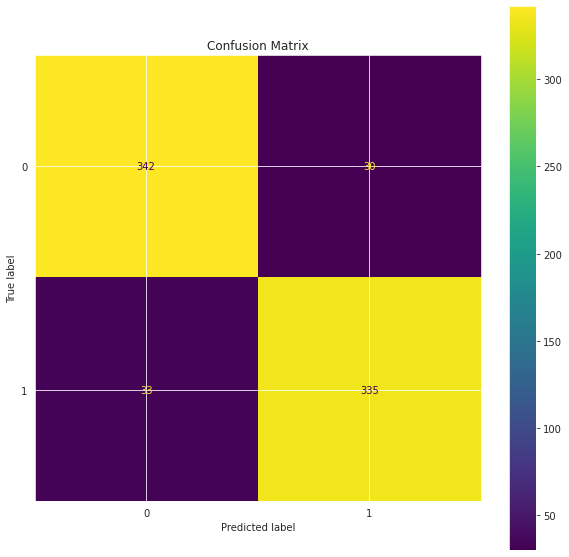

In [37]:
cm = confusion_matrix(y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [39]:
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),y_test)))

Train Accuracy : 0.97 %
Test Accuracy : 0.90 %


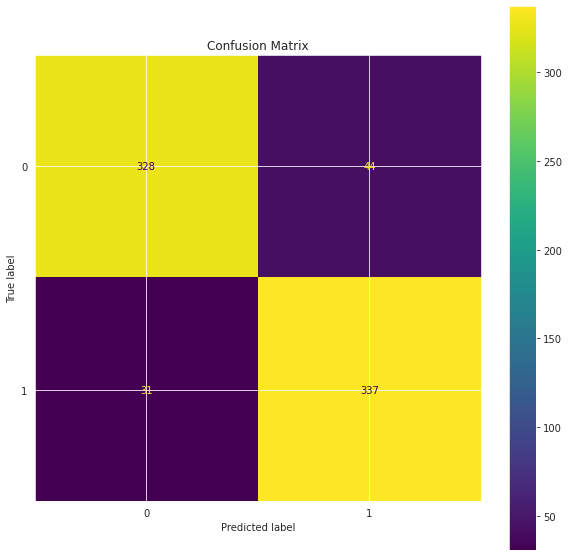

In [41]:
cm = confusion_matrix(y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()